In [1]:
import pandas as pd
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [5]:
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

In [66]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [67]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [68]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [8]:
import numpy as np

In [69]:
y_label = clf.predict(np.array([0,2,3,4]))

ValueError: Expected 2D array, got 1D array instead:
array=[0. 2. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [70]:
y_preds = clf.predict(X_test)

In [71]:
y_preds

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1], dtype=int64)

In [27]:
clf.score(X_train, y_train)

1.0

In [75]:
clf.score(X_test, y_test)

0.7377049180327869

In [74]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.85      0.57      0.68        30
           1       0.68      0.90      0.78        31

    accuracy                           0.74        61
   macro avg       0.77      0.73      0.73        61
weighted avg       0.77      0.74      0.73        61



In [46]:
accuracy_score(y_test,y_preds)

0.819672131147541

In [76]:
np.random.seed(42)
for i in range(1,100,5):
    print(f"Trying model with {i} estimators..")
    clf = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print(f"Model accuracy on test set: {clf.score(X_test, y_test) * 100:.2f}%")

Trying model with 1 estimators..
Model accuracy on test set: 73.77%
Trying model with 6 estimators..
Model accuracy on test set: 72.13%
Trying model with 11 estimators..
Model accuracy on test set: 77.05%
Trying model with 16 estimators..
Model accuracy on test set: 70.49%
Trying model with 21 estimators..
Model accuracy on test set: 73.77%
Trying model with 26 estimators..
Model accuracy on test set: 77.05%
Trying model with 31 estimators..
Model accuracy on test set: 77.05%
Trying model with 36 estimators..
Model accuracy on test set: 70.49%
Trying model with 41 estimators..
Model accuracy on test set: 73.77%
Trying model with 46 estimators..
Model accuracy on test set: 72.13%
Trying model with 51 estimators..
Model accuracy on test set: 75.41%
Trying model with 56 estimators..
Model accuracy on test set: 72.13%
Trying model with 61 estimators..
Model accuracy on test set: 73.77%
Trying model with 66 estimators..
Model accuracy on test set: 73.77%
Trying model with 71 estimators..
Mo

In [36]:
import pickle

pickle.dump(clf, open("random_forest_model_1.pk1","wb"))

In [79]:
loaded_model = pickle.load(open("random_forest_model_1.pk1", "rb"))
loaded_model.score(X_test,y_test)


0.9344262295081968

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
heart_disease = pd.read_csv("heart-disease.csv")

In [3]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
X = heart_disease.drop("target",axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [6]:
y = heart_disease["target"]
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [9]:
car_sales = pd.read_csv("car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [12]:
 X = car_sales.drop("Price",axis=1)
y = car_sales["Price"]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [17]:
from sklearn.ensemble import RandomForestRegressor

In [18]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test,y_test)

ValueError: could not convert string to float: 'Nissan'

In [21]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make","Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorical_features)],
                               remainder='passthrough')
transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [23]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [27]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X,
                                                   y,
                                                   test_size=0.2)

In [29]:
model.fit(X_train,y_train)

RandomForestRegressor()

In [30]:
model.score(X_test,y_test)

0.3281222657899089

In [47]:
import pandas as pd
car_sales_missing = pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [15]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [2]:
X = car_sales_missing.drop("Price",axis=1)
y = car_sales_missing["Price"]

In [3]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make","Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorical_features)],
                               remainder="passthrough")
transformed_X = transformer.fit_transform(X)
transformed_X

ValueError: Input contains NaN

In [16]:
car_sales_missing["Make"].fillna("missing",inplace=True)
car_sales_missing["Colour"].fillna("missing",inplace=True)
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(),inplace=True)
car_sales_missing["Doors"].fillna(4,inplace=True)

In [17]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [18]:
car_sales_missing.dropna(inplace=True)

In [19]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [42]:
len(car_sales_missing)

950

In [43]:
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]
len(X)

950

In [46]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

catergorical_features = ["Make","Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorical_features)],
                               remainder="passthrough")
transformed_X = transformer.fit_transform(X)
gg = pd.DataFrame(transformed_X)
gg

,0
0,"(0, 1)\t1.0\n (0, 9)\t1.0\n (0, 12)\t1.0\n..."
1,"(0, 0)\t1.0\n (0, 6)\t1.0\n (0, 13)\t1.0\n..."
2,"(0, 1)\t1.0\n (0, 9)\t1.0\n (0, 12)\t1.0\n..."
3,"(0, 3)\t1.0\n (0, 9)\t1.0\n (0, 12)\t1.0\n..."
4,"(0, 2)\t1.0\n (0, 6)\t1.0\n (0, 11)\t1.0\n..."
...,...
945,"(0, 3)\t1.0\n (0, 5)\t1.0\n (0, 12)\t1.0\n..."
946,"(0, 4)\t1.0\n (0, 9)\t1.0\n (0, 11)\t1.0\n..."
947,"(0, 2)\t1.0\n (0, 6)\t1.0\n (0, 12)\t1.0\n..."
948,"(0, 1)\t1.0\n (0, 9)\t1.0\n (0, 12)\t1.0\n..."


In [32]:

model = RandomForestRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.27198872430571086

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
X_train, X_test, y_train, y_test = train_test_split(transformed_X,y,test_size=0.2)
X_test.shape, y_test.shape, X_train.shape, y_train.shape

((190, 15), (190,), (760, 15), (760,))

In [33]:
model = RandomForestRegressor()
model.fit(X_train,X_test)
model.score(y_test,y_test)

ValueError: sparse multilabel-indicator for y is not supported.

In [34]:
X_train

<760x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3040 stored elements in Compressed Sparse Row format>

In [39]:
X_test

<190x15 sparse matrix of type '<class 'numpy.float64'>'
	with 760 stored elements in Compressed Sparse Row format>

In [48]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [49]:
car_sales_missing.dropna(subset=["Price"],inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [51]:
X = car_sales_missing.drop("Price",axis=1)
y = car_sales_missing["Price"]

In [52]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

cat_imputer = SimpleImputer(strategy="constant",fill_value="missing")
door_imputer = SimpleImputer(strategy="constant",fill_value=4)
num_imputer = SimpleImputer(strategy="mean")


In [53]:
cat_features = ["Make","Colour"]
door_features = ["Doors"]
num_faetures = ["Odometer (KM)"]

In [54]:
imputer = ColumnTransformer([("cat_imputer",cat_imputer, cat_features),
                            ("door_features",door_imputer, door_features),
                            ("num_imputer",num_imputer, num_faetures)])
filled_X = imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [56]:
car_sales_filled = pd.DataFrame(filled_X,
                               columns=["Make","Colour","Doors","Odometer (KM)"])
car_sales_filled

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4,35431
1,BMW,Blue,5,192714
2,Honda,White,4,84714
3,Toyota,White,4,154365
4,Nissan,Blue,3,181577
...,...,...,...,...
945,Toyota,Black,4,35820
946,missing,White,3,155144
947,Nissan,Blue,4,66604
948,Honda,White,4,215883


In [57]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [58]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features = ["Make","Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",one_hot,categorical_features)])
transformed_X = transformer.fit_transform(car_sales_filled)
transformed_X

<950x14 sparse matrix of type '<class 'numpy.float64'>'
	with 2850 stored elements in Compressed Sparse Row format>

In [62]:
import numpy as np
np.random.seed(25)
from sklearn.ensemble impo rt RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(transformed_X,y,test_size=0.2)

In [64]:
model = RandomForestRegressor(100)
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.22131676606734574

In [66]:
from sklearn.datasets import load_boston
boston = load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [71]:
bostondf = pd.DataFrame(boston["data"],columns=boston["feature_names"])
bostondf["target"]= pd.Series(boston["target"])
bostondf

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [72]:
from sklearn.linear_model import Ridge
np.random.seed(42)
X = bostondf.drop("target",axis=1)
y = bostondf["target"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

model = Ridge()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.6662221670168518

In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
boston = load_boston()
boston_df = pd.DataFrame(boston["data"],columns=boston["feature_names"])
boston_df["target"] = pd.Series(boston["target"])
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
X = boston_df.drop("target", axis=1)
y = boston_df["target"]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8654448653350507

### Choosing an estimator for a classification problem

In [3]:
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
np.random.seed(42)
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
clf = LinearSVC()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.8688524590163934

In [5]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8524590163934426

In [6]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
heart_disease = pd.read_csv("heart-disease.csv")
np.random.seed(42)

X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
clf = RandomForestClassifier()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.8524590163934426

In [7]:
from sklearn.model_selection import cross_val_score
model.score(X_test,y_test)

0.8524590163934426

In [6]:
cross_val_score(model,X,y) 

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

**Area under the receiver operation characteristic curve (AUC/ROC)**
* Area under curve (AUC)
* Receiver operation curve (ROC)

In [11]:
from sklearn.metrics import roc_curve
y_preds = model.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [16]:
fpr, tpr,  thresholds = roc_curve(y_test,y_preds,y_preds[:,1])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass pos_label=[0.11 0.51 0.56 0.16 0.82 0.86 0.63 0.05 0.01 0.54 0.74 0.31 0.89 0.05
 0.97 0.98 0.99 0.16 0.05 0.02 0.5  0.11 0.61 0.72 0.75 0.65 0.8  0.78
 0.17 0.85 0.06 0.08 0.04 0.37 0.54 0.11 0.55 0.84 0.67 0.92 0.87 0.83
 0.81 0.62 0.68 0.24 0.6  1.   0.17 0.03 0.15 0.2  0.75 0.75 0.13 0.07
 0.3  0.99 0.13 0.   0.13] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


ValueError: y should be a 1d array, got an array of shape (61, 2) instead.

In [18]:
y_test.shape()

TypeError: 'tuple' object is not callable

In [10]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_preds) 

NameError: name 'y_preds' is not defined

In [12]:
pd.crosstab(y_test,
           y_preds,
           rownames=["Actual Label"],
           colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Label,,
0,24,5
1,3,29


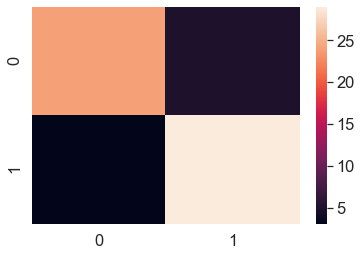

In [13]:
import seaborn as sns

sns.set(font_scale=1.5)

conf_mat = confusion_matrix(y_test, y_preds)
sns.heatmap(conf_mat);

In [12]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [25]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
heart_disease = pd.read_csv("heart-disease.csv")
X = heart_disease.drop("target",axis =1)
y = heart_disease["target"]
clf = RandomForestClassifier()


In [8]:
cv_acc = cross_val_score(clf,X,y,cv=5)
cv_acc

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

In [9]:
print(f"{np.mean(cv_acc)*100:.2f}%")

80.18%


In [10]:
np.random.seed(42)
cv_acc = cross_val_score(clf,X,y,cv=5,scoring="accuracy")
print(f"{np.mean(cv_acc)*100:.2f}%")

82.48%


In [18]:
clf.get_params()
from sklearn.metrics import precision_score, recall_score, f1_score

In [20]:
def evaluate_predictions(y_true, y_predictions):
    accuracy = accuracy_score(y_true,y_predictions)
    precision = precision_score(y_true,y_predictions)
    recall = recall_score(y_true, y_predictions)
    f1 = f1_score(y_true,y_predictions)
    metric_dict = {"accuracy":round(accuracy,2),
                  "precision": round(precision,2),
                  "f1":round(recall,2),}
    print(f"Accurcay {accuracy*100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall:{recall:.2f}")
    print(f"F1 Score: {f1:.2f}")

In [21]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [28]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
heart_disease_shuffled = heart_disease.sample(frac=1)
heart_disease_shuffled

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1,0
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3,0
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3,1
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3,0
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3,1
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2,1
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0


In [29]:
X = heart_disease_shuffled.drop("target",axis=1)
y = heart_disease_shuffled["target"]

train_split = round(0.7 *len(heart_disease_shuffled))

In [30]:
train_split

212

In [31]:
valid_split = round(train_split+0.15*len(heart_disease_shuffled))

In [32]:
valid_split

257

In [35]:
X_train,y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]


In [36]:
len(X_train), len(X_valid), len(X_test)

(212, 45, 46)

In [37]:
clf = RandomForestClassifier()

In [38]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [39]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [42]:
y_predictions = clf.predict(X_valid)
baseline_metrics = evaluate_predictions(y_valid, y_predictions)
baseline_metrics

Accurcay 82.22%
Precision: 0.81
Recall:0.88
F1 Score: 0.85


In [54]:
np.random.seed(42)
clf2 = RandomForestClassifier(max_depth=2)
clf2.fit(X_train, y_train)

y_predictions_2 = clf2.predict(X_valid)
clf2_metrics = evalutae_predictions(y_valid, y_predictions_2)

Accurcay 84.44%
Precision: 0.82
Recall:0.92
F1 Score: 0.87


In [64]:
from sklearn.model_selection import RandomizedSearchCV

grid ={"n_estimators":[10,20,100,200,500,1000,1200],
       "max_depth": [None,5,10,20,30],
       "max_features":["auto","sqrt"],
       "min_samples_split" : [2,4,6],
       "min_samples_leaf" : [1,2,4]} 
np.random.seed(42)
X = heart_disease_shuffled.drop("target",axis=1)
y = heart_disease_shuffled["target"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
clf = RandomForestClassifier(n_jobs=-1)


In [71]:
rs_clf = RandomizedSearchCV(estimator=clf,
                           param_distributions=grid,
                           n_iter=300,
                           cv=5,
                           verbose=3)

In [72]:
rs_clf.fit(X_train,y_train)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits
[CV] n_estimators=20, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=20, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=5, score=0.755, total=   1.9s
[CV] n_estimators=20, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=5 
[CV]  n_estimators=20, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=5, score=0.816, total=   0.0s
[CV] n_estimators=20, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=5 
[CV]  n_estimators=20, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=5, score=0.750, total=   0.0s
[CV] n_estimators=20, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=5 
[CV]  n_estimators=20, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=5, score=0.875, total=   0.0s
[CV] n_estimators=20, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=5 
[CV]  n_estimators=20, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=5, score=0.854, total=   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.9s remaining:    0.0s


[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=10, score=0.755, total=   0.1s
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=10, score=0.837, total=   0.1s
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=10, score=0.750, total=   0.1s
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=10, score=0.833, total=   0.1s
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=10, score=0.854, t

[CV]  n_estimators=500, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=10, score=0.750, total=   0.4s
[CV] n_estimators=500, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=10 
[CV]  n_estimators=500, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=10, score=0.875, total=   0.4s
[CV] n_estimators=500, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=10 
[CV]  n_estimators=500, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=10, score=0.875, total=   0.4s
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, score=0.816, total=   0.1s
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, score=0.816, total

[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=None, score=0.796, total=   0.2s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=None 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=None, score=0.837, total=   0.2s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=None 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=None, score=0.750, total=   0.2s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=None 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=None, score=0.875, total=   0.2s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=None 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=No

[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=5, score=0.771, total=   0.2s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=5 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=5, score=0.833, total=   0.2s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=5 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=5, score=0.875, total=   0.2s
[CV] n_estimators=1200, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=None 
[CV]  n_estimators=1200, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=None, score=0.837, total=   0.7s
[CV] n_estimators=1200, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=None 
[CV]  n_estimators=1200, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=None, score=0

[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=30, score=0.857, total=   0.2s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=30 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=30, score=0.837, total=   0.2s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=30 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=30, score=0.729, total=   0.2s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=30 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=30, score=0.875, total=   0.2s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=30 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=30, score=0.875, t

[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=30, score=0.796, total=   0.1s
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=30, score=0.750, total=   0.1s
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=30, score=0.875, total=   0.1s
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=30, score=0.854, total=   0.1s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=5, score=0.816, t

[CV]  n_estimators=1200, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=5, score=0.875, total=   0.7s
[CV] n_estimators=1200, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=5, score=0.875, total=   0.7s
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=30 
[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=30, score=0.776, total=   0.1s
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=30 
[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=30, score=0.857, total=   0.1s
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=30 
[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=30, score=0.771, t

[CV]  n_estimators=500, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=5, score=0.816, total=   0.4s
[CV] n_estimators=500, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=5 
[CV]  n_estimators=500, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=5, score=0.816, total=   0.4s
[CV] n_estimators=500, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=5 
[CV]  n_estimators=500, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=5, score=0.812, total=   0.4s
[CV] n_estimators=500, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=5 
[CV]  n_estimators=500, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=5, score=0.875, total=   0.4s
[CV] n_estimators=500, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=5 
[CV]  n_estimators=500, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=5, score=0.875, total=   0

[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=None, score=0.854, total=   0.2s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=None 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=None, score=0.875, total=   0.2s
[CV] n_estimators=1000, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=None 
[CV]  n_estimators=1000, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=None, score=0.796, total=   0.6s
[CV] n_estimators=1000, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=None 
[CV]  n_estimators=1000, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=None, score=0.796, total=   0.6s
[CV] n_estimators=1000, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=None 
[CV]  n_estimators=1000, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_de

[CV]  n_estimators=1000, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=None, score=0.776, total=   0.6s
[CV] n_estimators=1000, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=None 
[CV]  n_estimators=1000, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=None, score=0.796, total=   0.6s
[CV] n_estimators=1000, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=None 
[CV]  n_estimators=1000, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=None, score=0.771, total=   0.6s
[CV] n_estimators=1000, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=None 
[CV]  n_estimators=1000, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=None, score=0.875, total=   0.6s
[CV] n_estimators=1000, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=None 
[CV]  n_estimators=1000, min_samples_split=6, min_samples_leaf=1, max_features=auto, max

[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=10, score=0.854, total=   0.2s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=10 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=10, score=0.854, total=   0.2s
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=10 
[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=10, score=0.735, total=   0.0s
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=10 
[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=10, score=0.837, total=   0.0s
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=10 
[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=10, score=0.708, total= 

[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=20, score=0.816, total=   0.6s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=20 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=20, score=0.816, total=   0.6s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=20 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=20, score=0.750, total=   0.6s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=20 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=20, score=0.875, total=   0.6s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=20 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=20, score

[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=5, score=0.729, total=   0.4s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=5 
[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=5, score=0.875, total=   0.4s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=5 
[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=5, score=0.875, total=   0.4s
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=None 
[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=None, score=0.755, total=   0.0s
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=None 
[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=None, score=0.816, to

[CV]  n_estimators=500, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=10, score=0.776, total=   0.4s
[CV] n_estimators=500, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=10 
[CV]  n_estimators=500, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=10, score=0.857, total=   0.4s
[CV] n_estimators=500, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=10 
[CV]  n_estimators=500, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=10, score=0.750, total=   0.4s
[CV] n_estimators=500, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=10 
[CV]  n_estimators=500, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=10, score=0.875, total=   0.4s
[CV] n_estimators=500, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=10 
[CV]  n_estimators=500, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=10, score=0.875, t

[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=30, score=0.771, total=   0.1s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=30 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=30, score=0.854, total=   0.1s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=30 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=30, score=0.875, total=   0.1s
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=5 
[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=5, score=0.776, total=   0.0s
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=5 
[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=5, score=0.776, total=   

[CV]  n_estimators=500, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=5, score=0.875, total=   0.4s
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=30, score=0.796, total=   0.1s
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=30, score=0.796, total=   0.1s
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=30, score=0.729, total=   0.1s
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=30, score=0.854, to

[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=None, score=0.816, total=   0.1s
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=None 
[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=None, score=0.708, total=   0.1s
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=None 
[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=None, score=0.854, total=   0.1s
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=None 
[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=None, score=0.875, total=   0.1s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=20 
[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=20, 

[CV]  n_estimators=1200, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=5, score=0.796, total=   0.8s
[CV] n_estimators=1200, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=5, score=0.776, total=   0.7s
[CV] n_estimators=1200, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=5, score=0.750, total=   0.8s
[CV] n_estimators=1200, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=5, score=0.875, total=   0.7s
[CV] n_estimators=1200, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=5, score=0.875, t

[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=30, score=0.816, total=   0.7s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=30 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=30, score=0.816, total=   0.6s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=30 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=30, score=0.750, total=   0.6s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=30 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=30, score=0.875, total=   0.6s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=30 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=30, score

[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10, score=0.854, total=   0.2s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10, score=0.875, total=   0.2s
[CV] n_estimators=20, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=None 
[CV]  n_estimators=20, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=None, score=0.776, total=   0.0s
[CV] n_estimators=20, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=None 
[CV]  n_estimators=20, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=None, score=0.776, total=   0.0s
[CV] n_estimators=20, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=None 
[CV]  n_estimators=20, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=None, score=0.

[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=30, score=0.776, total=   0.6s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=30 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=30, score=0.796, total=   0.6s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=30 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=30, score=0.771, total=   0.6s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=30 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=30, score=0.896, total=   0.6s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=30 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=30, score

[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=30, score=0.729, total=   0.7s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=30 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=30, score=0.875, total=   0.7s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=30 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=30, score=0.875, total=   0.7s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=30 
[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=30, score=0.796, total=   0.7s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=30 
[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=30, score

[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=5, score=0.816, total=   0.0s
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=5 
[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=5, score=0.729, total=   0.0s
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=5 
[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=5, score=0.875, total=   0.0s
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=5 
[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=5, score=0.792, total=   0.0s
[CV] n_estimators=500, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=30 
[CV]  n_estimators=500, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=30, score=0.837, total=   0.4s
[

[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=30, score=0.854, total=   0.4s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=30 
[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=30, score=0.875, total=   0.4s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=5, score=0.816, total=   0.6s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=5, score=0.816, total=   0.6s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=5, score=0.750, t

[CV]  n_estimators=500, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=10, score=0.776, total=   0.4s
[CV] n_estimators=500, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=500, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=10, score=0.837, total=   0.4s
[CV] n_estimators=500, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=500, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=10, score=0.771, total=   0.4s
[CV] n_estimators=500, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=500, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=10, score=0.875, total=   0.4s
[CV] n_estimators=500, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=500, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=10, score=0.875, t

[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=30, score=0.896, total=   0.1s
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=30 
[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=30, score=0.833, total=   0.1s
[CV] n_estimators=200, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=20 
[CV]  n_estimators=200, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=20, score=0.796, total=   0.2s
[CV] n_estimators=200, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=20 
[CV]  n_estimators=200, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=20, score=0.837, total=   0.2s
[CV] n_estimators=200, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=20 
[CV]  n_estimators=200, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=20, score=0.792, t

[CV]  n_estimators=10, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=None, score=0.896, total=   0.0s
[CV] n_estimators=10, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=None 
[CV]  n_estimators=10, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=None, score=0.812, total=   0.0s
[CV] n_estimators=10, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=10 
[CV]  n_estimators=10, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=10, score=0.714, total=   0.0s
[CV] n_estimators=10, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=10 
[CV]  n_estimators=10, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=10, score=0.755, total=   0.0s
[CV] n_estimators=10, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=10 
[CV]  n_estimators=10, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=10, score=0.792, tota

[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=20, score=0.816, total=   0.2s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=20 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=20, score=0.796, total=   0.2s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=20 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=20, score=0.729, total=   0.2s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=20 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=20, score=0.833, total=   0.2s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=20 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=20, score=0.875, t

[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=5, score=0.875, total=   0.2s
[CV] n_estimators=20, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=5 
[CV]  n_estimators=20, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=5, score=0.796, total=   0.0s
[CV] n_estimators=20, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=5 
[CV]  n_estimators=20, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=5, score=0.837, total=   0.0s
[CV] n_estimators=20, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=5 
[CV]  n_estimators=20, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=5, score=0.750, total=   0.0s
[CV] n_estimators=20, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=5 
[CV]  n_estimators=20, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=5, score=0.812, total=   0.0s
[CV]

[CV]  n_estimators=200, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=None, score=0.792, total=   0.2s
[CV] n_estimators=200, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=None 
[CV]  n_estimators=200, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=None, score=0.854, total=   0.2s
[CV] n_estimators=200, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=None 
[CV]  n_estimators=200, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=None, score=0.854, total=   0.2s
[CV] n_estimators=200, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=5 
[CV]  n_estimators=200, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=5, score=0.796, total=   0.2s
[CV] n_estimators=200, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=5 
[CV]  n_estimators=200, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=5, score=0.

[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=5, score=0.796, total=   0.7s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=5, score=0.796, total=   0.7s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=5, score=0.750, total=   0.7s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=5, score=0.854, total=   0.7s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=5, score=0.875, t

[CV]  n_estimators=1200, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=30, score=0.729, total=   0.7s
[CV] n_estimators=1200, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=30 
[CV]  n_estimators=1200, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=30, score=0.875, total=   0.7s
[CV] n_estimators=1200, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=30 
[CV]  n_estimators=1200, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=30, score=0.875, total=   0.7s
[CV] n_estimators=500, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=None 
[CV]  n_estimators=500, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=None, score=0.776, total=   0.4s
[CV] n_estimators=500, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=None 
[CV]  n_estimators=500, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=None, s

[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=5, score=0.816, total=   0.1s
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=5 
[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=5, score=0.816, total=   0.1s
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=5 
[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=5, score=0.750, total=   0.1s
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=5 
[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=5, score=0.854, total=   0.1s
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=5 
[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=5, score=0.833, total=   0

[CV]  n_estimators=1000, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=10, score=0.896, total=   0.6s
[CV] n_estimators=1000, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=10, score=0.875, total=   0.6s
[CV] n_estimators=20, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=5 
[CV]  n_estimators=20, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=5, score=0.816, total=   0.0s
[CV] n_estimators=20, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=5 
[CV]  n_estimators=20, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=5, score=0.878, total=   0.0s
[CV] n_estimators=20, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=5 
[CV]  n_estimators=20, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=5, score=0.750, total=   0

[CV]  n_estimators=200, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=10, score=0.837, total=   0.2s
[CV] n_estimators=200, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=10 
[CV]  n_estimators=200, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=10, score=0.708, total=   0.2s
[CV] n_estimators=200, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=10 
[CV]  n_estimators=200, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=10, score=0.875, total=   0.2s
[CV] n_estimators=200, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=10 
[CV]  n_estimators=200, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=10, score=0.875, total=   0.2s
[CV] n_estimators=200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=None 
[CV]  n_estimators=200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=None, score=0.79

[CV]  n_estimators=1200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, score=0.776, total=   0.7s
[CV] n_estimators=1200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=1200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, score=0.796, total=   0.7s
[CV] n_estimators=1200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=1200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, score=0.750, total=   0.7s
[CV] n_estimators=1200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=1200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, score=0.875, total=   0.7s
[CV] n_estimators=1200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=1200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, score

[CV]  n_estimators=1200, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=10, score=0.729, total=   0.7s
[CV] n_estimators=1200, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1200, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=10, score=0.875, total=   0.7s
[CV] n_estimators=1200, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1200, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=10, score=0.875, total=   0.7s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=None 
[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=None, score=0.776, total=   0.7s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=None 
[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=Non

[CV]  n_estimators=10, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=None, score=0.816, total=   0.0s
[CV] n_estimators=10, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=None 
[CV]  n_estimators=10, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=None, score=0.755, total=   0.0s
[CV] n_estimators=10, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=None 
[CV]  n_estimators=10, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=None, score=0.792, total=   0.0s
[CV] n_estimators=10, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=None 
[CV]  n_estimators=10, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=None, score=0.812, total=   0.0s
[CV] n_estimators=10, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=None 
[CV]  n_estimators=10, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=None, score

[CV]  n_estimators=1200, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=None, score=0.729, total=   0.7s
[CV] n_estimators=1200, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=None 
[CV]  n_estimators=1200, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=None, score=0.875, total=   0.7s
[CV] n_estimators=1200, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=None 
[CV]  n_estimators=1200, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=None, score=0.875, total=   0.7s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=30, score=0.796, total=   0.2s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=30,

[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=None, score=0.776, total=   0.7s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=None 
[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=None, score=0.755, total=   0.7s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=None 
[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=None, score=0.792, total=   0.7s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=None 
[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=None, score=0.896, total=   0.7s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=None 
[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=1, max_features=auto, max

[Parallel(n_jobs=1)]: Done 1500 out of 1500 | elapsed:  7.4min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1),
                   n_iter=300,
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 20, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=3)

In [77]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [78]:
rs_y_preds = rs_clf.predict(X_test)
rs_metrics = evaluate_predictions(y_test, rs_y_preds)

Accurcay 83.61%
Precision: 0.78
Recall:0.89
F1 Score: 0.83


In [79]:
grid

{'n_estimators': [10, 20, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [80]:
from sklearn.model_selection import GridSearchCV

grid ={"n_estimators":[10,20,100,200,500,1000,1200],
       "max_depth": [None,5,10,20,30],
       "max_features":["auto","sqrt"],
       "min_samples_split" : [2,4,6],
       "min_samples_leaf" : [1,2,4]} 
np.random.seed(42)
X = heart_disease_shuffled.drop("target",axis=1)
y = heart_disease_shuffled["target"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
clf = RandomForestClassifier(n_jobs=-1)
gs_clf = GridSearchCV(estimator=clf,
                      cv=5,
                     verbose=2,
                     param_grid=grid)
gs_clf.fit(X_train,y_train)

Fitting 5 folds for each of 630 candidates, totalling 3150 fits
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10, total=   1.9s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10, total=   0.8s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10, total=   0.0s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10, total=   0.0s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10, total=   0.0s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=20 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=20, total=   0.0s
[CV] max_depth=None, max_features=auto, min

[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=20, total=   0.0s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=20 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=20, total=   0.0s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=20 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=20, total=   0.0s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=auto,

[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200, total=   0.2s
[CV] max_depth=None, max_features=

[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200, total=   0.2s
[CV] max_depth=None, max_features=

[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=500 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=500, total=   0.4s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=500 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=500, total=   0.4s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=500 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=500, total=   0.4s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=500 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=500, total=   0.4s
[CV] max_depth=None, max_features=

[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=500, total=   0.4s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=500, total=   0.4s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=1000 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=1000, total=   0.6s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=1000 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=1000, total=   0.7s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=1000 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=1000, total=   0.7s
[CV] max_depth=None, max_fea

[CV]  max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1000, total=   0.6s
[CV] max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1000 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1000, total=   0.6s
[CV] max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1000 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1000, total=   0.6s
[CV] max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200, total=   0.7s
[CV] max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200, total=   0.7s
[CV] max_depth=None, max_

[CV]  max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=1200, total=   0.7s
[CV] max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=1200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=1200, total=   0.7s
[CV] max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=1200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=1200, total=   0.7s
[CV] max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=1200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=1200, total=   0.7s
[CV] max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=10 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=10, total=   0.0s
[CV] max_depth=None, max_feat

[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=20, total=   0.0s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=20 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=20, total=   0.0s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=20 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=20, total=   0.0s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=sqrt,

[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=200 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=200, total=   0.2s
[CV] max_depth=None, max_features=

[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200, total=   0.2s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200, total=   0.2s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200, total=   0.2s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200, total=   0.2s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200, total=   0.2s
[CV] max_depth=None, max_features=

[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200, total=   0.2s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=500, total=   0.4s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=500, total=   0.5s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=500, total=   0.4s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=500, total=   0.4s
[CV] max_depth=None, max_features=

[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=500, total=   0.4s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=500, total=   0.4s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1000 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1000, total=   0.6s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1000 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1000, total=   0.6s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1000 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1000, total=   0.6s
[CV] max_depth=None, max_fea

[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1000, total=   0.6s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1000 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1000, total=   0.7s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1000 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1000, total=   0.6s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200, total=   0.7s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200, total=   0.7s
[CV] max_depth=None, max_

[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1200, total=   0.7s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1200 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1200, total=   0.9s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1200 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1200, total=   0.7s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1200 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1200, total=   0.7s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=10 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=10, total=   0.0s
[CV] max_depth=None, max_feat

[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=20, total=   0.0s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=20 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=20, total=   0.0s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=20 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=20, total=   0.0s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=sqrt,

[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200, total=   0.2s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_

[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=200, total=   0.2s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=200 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=200, total=   0.2s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=200 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=200, total=   0.2s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500, total=   0.4s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500, total=   0.4s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_

[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.4s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.4s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.4s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=1000 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=1000, total=   0.6s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=1000 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=1000, total=   0.6s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, 

[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000, total=   0.6s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000, total=   0.6s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000, total=   0.6s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1200 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1200, total=   0.7s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1200 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1200, total=   0.7s
[CV] max_depth=5, max_features=auto, min_samples_lea

[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1200, total=   0.7s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1200 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1200, total=   0.7s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1200 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1200, total=   0.9s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=10 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=10, total=   0.0s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=10 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=10, total=   0.0s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min

[CV]  max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=20, total=   0.0s
[CV] max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=20 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=20, total=   0.0s
[CV] max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=5, max_features=auto, min_samples_leaf=4, min_sam

[CV]  max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   0.1s
[CV] max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   0.1s
[CV] max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200, total=   0.2s
[CV] max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200, total=   0.2s
[CV] max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200, total=   0.2s
[CV] max_depth=5, max_features=auto, min_samples_leaf=4, min_

[CV]  max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=200, total=   0.2s
[CV] max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=500 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=500, total=   0.4s
[CV] max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=500 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=500, total=   0.4s
[CV] max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=500 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=500, total=   0.4s
[CV] max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=500 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=500, total=   0.4s
[CV] max_depth=5, max_features=auto, min_samples_leaf=4, min_

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000, total=   0.7s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000, total=   0.6s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000, total=   0.6s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000, total=   0.7s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1000, total=   0.6s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1200, total=   0.7s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1200, total=   0.7s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1200, total=   0.8s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1200, total=   0.7s
[CV] max_depth=5, max_features=sqrt, min_samples_lea

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1200, total=   0.7s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10, total=   0.0s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10, total=   0.0s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10, total=   0.0s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10, total=   0.0s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=20, total=   0.0s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=20 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=20, total=   0.0s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=20 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=20, total=   0.0s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=   0.1s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=   0.1s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_sampl

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200, total=   0.2s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200, total=   0.2s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200, total=   0.2s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.2s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=500, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1000 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1000, total=   0.6s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1000 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1000, total=   0.6s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1000 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1000, total=   0.6s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1000 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1000, total=   0.6s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=1000, total=   0.6s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=1200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=1200, total=   0.7s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=1200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=1200, total=   0.7s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=1200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=1200, total=   0.7s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=1200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=1200, total=   0.7s
[CV] max_depth=5, max_features=sqrt, min_samples_lea

[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1200, total=   0.7s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=10 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=10, total=   0.0s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=10 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=10, total=   0.0s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=10 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=10, total=   0.0s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=10 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=10, total=   0.0s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, m

[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=20, total=   0.0s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=20 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=20, total=   0.0s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=20 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=20, total=   0.0s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1,

[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200, total=   0.2s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200, total=   0.2s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200, total=   0.2s
[CV] max_depth=10, max_features=auto, min_samples_le

[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200, total=   0.2s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=500 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=500, total=   0.4s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=500 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=500, total=   0.4s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=500 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=500, total=   0.4s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=500 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=500, total=   0.4s
[CV] max_depth=10, max_features=auto, min_samples_le

[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=500, total=   0.4s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=1000 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=1000, total=   0.6s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=1000 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=1000, total=   0.6s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=1000 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=1000, total=   0.6s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=1000 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=1000, total=   0.6s
[CV] max_depth=10, max_features=auto, min_sa

[CV]  max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1000, total=   0.6s
[CV] max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200, total=   0.7s
[CV] max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200, total=   0.7s
[CV] max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200, total=   0.7s
[CV] max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200, total=   0.7s
[CV] max_depth=10, max_features=auto, min_s

[CV]  max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=1200, total=   0.7s
[CV] max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=10 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=10, total=   0.0s
[CV] max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=10 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=10, total=   0.0s
[CV] max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=10 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=10, total=   0.0s
[CV] max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=10 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=10, total=   0.0s
[CV] max_depth=10, max_features=auto, min_samples_leaf=4, m

[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=20, total=   0.0s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=20 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=20, total=   0.0s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=20 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=20, total=   0.0s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1,

[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100, total=   0.1s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100, total=   0.1s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=200 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=200, total=   0.2s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=200 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=200, total=   0.2s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=200 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=200, total=   0.2s
[CV] max_depth=10, max_features=sqrt, min_samples_le

[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200, total=   0.2s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.4s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.4s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.4s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.4s
[CV] max_depth=10, max_features=sqrt, min_samples_le

[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=500, total=   0.4s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000, total=   0.7s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000, total=   0.6s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000, total=   0.7s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000, total=   0.6s
[CV] max_depth=10, max_features=sqrt, min_sa

[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1000, total=   0.6s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1200 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1200, total=   0.7s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1200 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1200, total=   0.7s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1200 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1200, total=   0.7s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1200 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1200, total=   0.7s
[CV] max_depth=10, max_features=sqrt, min_s

[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200, total=   0.7s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10, total=   0.0s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10, total=   0.0s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10, total=   0.0s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10, total=   0.0s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=4, m

[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=20, total=   0.0s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=20 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=20, total=   0.0s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=20 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=20, total=   0.0s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   0.1s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   0.1s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=4,

[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=100 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=200 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=200, total=   0.2s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=200 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=200, total=   0.2s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=200 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=200, total=   0.2s
[CV] max_depth=10, max_features=sqrt, min_samples_le

[CV]  max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200, total=   0.2s
[CV] max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500, total=   0.4s
[CV] max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500, total=   0.4s
[CV] max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500, total=   0.4s
[CV] max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500, total=   0.4s
[CV] max_depth=20, max_features=auto, min_samples_le

[CV]  max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500, total=   0.4s
[CV] max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1000 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1000, total=   0.6s
[CV] max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1000 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1000, total=   0.6s
[CV] max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1000 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1000, total=   0.6s
[CV] max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1000 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1000, total=   0.7s
[CV] max_depth=20, max_features=auto, min_sa

[CV]  max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=1000, total=   0.6s
[CV] max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=1200 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=1200, total=   0.7s
[CV] max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=1200 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=1200, total=   0.7s
[CV] max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=1200 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=1200, total=   0.7s
[CV] max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=1200 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=1200, total=   0.7s
[CV] max_depth=20, max_features=auto, min_s

[CV]  max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1200, total=   0.7s
[CV] max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=10 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=10, total=   0.0s
[CV] max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=10 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=10, total=   0.0s
[CV] max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=10 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=10, total=   0.0s
[CV] max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=10 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=10, total=   0.0s
[CV] max_depth=20, max_features=auto, min_samples_leaf=2, m

[CV]  max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=20, total=   0.0s
[CV] max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=20 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=20, total=   0.0s
[CV] max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=20 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=20, total=   0.0s
[CV] max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=20, max_features=auto, min_samples_leaf=2,

[CV]  max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.2s
[CV] max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.2s
[CV] max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.2s
[CV] max_depth=20, max_features=auto, min_samples_le

[CV]  max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200, total=   0.2s
[CV] max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=500 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=500, total=   0.4s
[CV] max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=500 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=500, total=   0.4s
[CV] max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=500 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=500, total=   0.4s
[CV] max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=500 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=500, total=   0.4s
[CV] max_depth=20, max_features=auto, min_samples_le

[CV]  max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=500, total=   0.4s
[CV] max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=1000 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=1000, total=   0.6s
[CV] max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=1000 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=1000, total=   0.6s
[CV] max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=1000 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=1000, total=   0.6s
[CV] max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=1000 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=1000, total=   0.6s
[CV] max_depth=20, max_features=auto, min_sa

[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000, total=   0.6s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1200 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1200, total=   0.7s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1200 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1200, total=   0.7s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1200 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1200, total=   0.7s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1200 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1200, total=   0.7s
[CV] max_depth=20, max_features=sqrt, min_s

[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1200, total=   0.7s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=10 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=10, total=   0.0s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=10 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=10, total=   0.0s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=10 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=10, total=   0.0s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=10 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=10, total=   0.0s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=1, m

[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=20, total=   0.0s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=20 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=20, total=   0.0s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=20 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=20, total=   0.0s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=2,

[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=   0.1s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=   0.1s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200, total=   0.2s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200, total=   0.2s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200, total=   0.2s
[CV] max_depth=20, max_features=sqrt, min_samples_le

[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200, total=   0.2s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=500 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=500, total=   0.4s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=500 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=500, total=   0.4s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=500 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=500, total=   0.4s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=500 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=500, total=   0.4s
[CV] max_depth=20, max_features=sqrt, min_samples_le

[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500, total=   0.4s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1000 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1000, total=   0.6s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1000 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1000, total=   0.6s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1000 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1000, total=   0.6s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1000 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1000, total=   0.6s
[CV] max_depth=20, max_features=sqrt, min_sa

[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1000, total=   0.6s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1200 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1200, total=   0.7s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1200 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1200, total=   0.7s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1200 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1200, total=   0.7s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1200 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1200, total=   0.7s
[CV] max_depth=20, max_features=sqrt, min_s

[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=1200, total=   0.7s
[CV] max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10, total=   0.0s
[CV] max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10, total=   0.0s
[CV] max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10, total=   0.0s
[CV] max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10, total=   0.0s
[CV] max_depth=30, max_features=auto, min_samples_leaf=1, m

[CV] max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=20 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=20, total=   0.0s
[CV] max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=20 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=20, total=   0.0s
[CV] max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100, total=   0.1s
[CV] max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100, total=   0.1s
[CV] max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_

[CV]  max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200, total=   0.2s
[CV] max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200, total=   0.2s
[CV] max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200, total=   0.2s
[CV] max_depth=30, max_features=auto, min_samples_le

[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200, total=   0.2s
[CV] max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=500 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=500, total=   0.4s
[CV] max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=500 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=500, total=   0.4s
[CV] max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=500 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=500, total=   0.4s
[CV] max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=500 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=500, total=   0.4s
[CV] max_depth=30, max_features=auto, min_samples_le

[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=500, total=   0.4s
[CV] max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000, total=   0.6s
[CV] max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000, total=   0.7s
[CV] max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000, total=   0.7s
[CV] max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000, total=   0.6s
[CV] max_depth=30, max_features=auto, min_sa

[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=1000, total=   0.6s
[CV] max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=1200 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=1200, total=   0.7s
[CV] max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=1200 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=1200, total=   0.7s
[CV] max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=1200 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=1200, total=   0.7s
[CV] max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=1200 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=1200, total=   0.7s
[CV] max_depth=30, max_features=auto, min_s

[CV]  max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200, total=   0.7s
[CV] max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=10 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=10, total=   0.0s
[CV] max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=10 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=10, total=   0.0s
[CV] max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=10 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=10, total=   0.0s
[CV] max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=10 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=10, total=   0.0s
[CV] max_depth=30, max_features=auto, min_samples_leaf=4, m

[CV]  max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=20, total=   0.0s
[CV] max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=20 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=20, total=   0.0s
[CV] max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=20 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=20, total=   0.0s
[CV] max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=30, max_features=auto, min_samples_leaf=4,

[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200, total=   0.2s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200, total=   0.2s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200, total=   0.2s
[CV] max_depth=30, max_features=sqrt, min_samples_le

[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=200, total=   0.2s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=500 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=500, total=   0.4s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=500 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=500, total=   0.4s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=500 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=500, total=   0.4s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=500 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=500, total=   0.4s
[CV] max_depth=30, max_features=sqrt, min_samples_le

[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.4s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000, total=   0.6s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000, total=   0.8s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000, total=   0.6s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000, total=   0.6s
[CV] max_depth=30, max_features=sqrt, min_sa

[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000, total=   0.6s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200, total=   0.7s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200, total=   0.7s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200, total=   0.7s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200, total=   0.7s
[CV] max_depth=30, max_features=sqrt, min_s

[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1200, total=   0.7s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=10 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=10, total=   0.0s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=10 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=10, total=   0.0s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=10 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=10, total=   0.0s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=10 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=10, total=   0.0s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=2, m

[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=20, total=   0.0s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=20 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=20, total=   0.0s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=20 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=20, total=   0.0s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=4,

[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   0.1s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   0.1s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=200 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=200, total=   0.2s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=200 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=200, total=   0.2s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=200 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=200, total=   0.2s
[CV] max_depth=30, max_features=sqrt, min_samples_le

[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=200, total=   0.2s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=200 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=200, total=   0.2s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=500 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=500, total=   0.4s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=500 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=500, total=   0.4s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=500 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=500, total=   0.4s
[CV] max_depth=30, max_features=sqrt, min_samples_le

[Parallel(n_jobs=1)]: Done 3150 out of 3150 | elapsed: 15.6min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1),
             param_grid={'max_depth': [None, 5, 10, 20, 30],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [10, 20, 100, 200, 500, 1000, 1200]},
             verbose=2)

In [84]:
gs_clf.best_params_

{'max_depth': 30,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 20}

In [85]:
gs_preds = gs_clf.predict(X_test)

In [86]:
gs_metrics = evaluate_predictions(y_test,gs_preds)

Accurcay 78.69%
Precision: 0.73
Recall:0.86
F1 Score: 0.79


In [94]:
import pickle
pickle.dump(gs_clf,open("random_forest_classifer_heart_disease.pk1","wb"))

In [95]:
loaded_model = pickle.load(open("random_forest_classifer_heart_disease.pk1","rb"))

In [2]:
from sklearn.pipeline import Pipeline

In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor

car_sales = pd.read_csv("car-sales-extended-missing-data.csv")
car_sales.dropna(subset=["Price"],inplace=True)

categorical_features = ["Make","Colour"]
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))])
door_feature = ["Doors"]
door_transformer = Pipeline(steps=[
    ("imputer",SimpleImputer(strategy="constant", fill_value=4))])
numeric_features = ["Odometer (KM)"]
numeric_transformer = Pipeline(steps=[
    ("imputer",SimpleImputer(strategy="mean"))])
preprocessor = ColumnTransformer(transformers=[
    ("cat", categorical_transformer, categorical_features),
    ("door", door_transformer, door_feature),
    ("num", numeric_transformer, numeric_features)])
model = Pipeline(steps=[("preprocessor",preprocessor),
                        ("model", RandomForestRegressor())])
X = car_sales.drop("Price",axis=1)
y = car_sales["Price"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.25823901289828655

In [7]:
pipe_grid = {"preprocessor__num__imputer__strategy":["mean","median"],
             "model__n_estimators":[100,1000],
             "model__max_depth":[None,5],
             "model__max_features":["auto"],
             "model__min_samples_split":[2,4]}

In [8]:
gs_model = GridSearchCV(model,pipe_grid,cv=5,verbose=2)
gs_model.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.2s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.2s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.2s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.2s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, 

[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median, total=   0.2s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median, total=   0.2s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median, total=   0.2s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_feat

[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean, total=   1.1s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median, total=   1.1s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median, total=   1.1s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=5, model__max_features=auto, model

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  1.1min finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
         

In [9]:
gs_model.score(X_test,y_test)

0.329871031643157